# Wine Dataset - Unsupervised Learning Project

### ================================================
### Section 1: Data Collection and Provenance
### ================================================

 Dataset Information
 - **Dataset Selected**: Wine Dataset
 - **Source**: UCI Machine Learning Repository
 - **Link**: https://archive.ics.uci.edu/ml/datasets/wine
 - **Researchers**: Forina et al.
 - **Institution**: University of Pisa (Italy)
 - **Data Collection**: Standard laboratory methods (spectrophotometry, titration, chromatography)
 - **Attributes**: 13 chemical features per sample
 - **Samples**: 178 wines from 3 different cultivars
 - **License**: Creative Commons Attribution 4.0

 ## Objective
 Apply unsupervised learning methods to group wines based on their chemical profiles, ignoring the provided "target" labels.

## Section 2: Exploratory Data Analysis (EDA)
#### ================================================

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA, NMF
from scipy.cluster.hierarchy import linkage, dendrogram

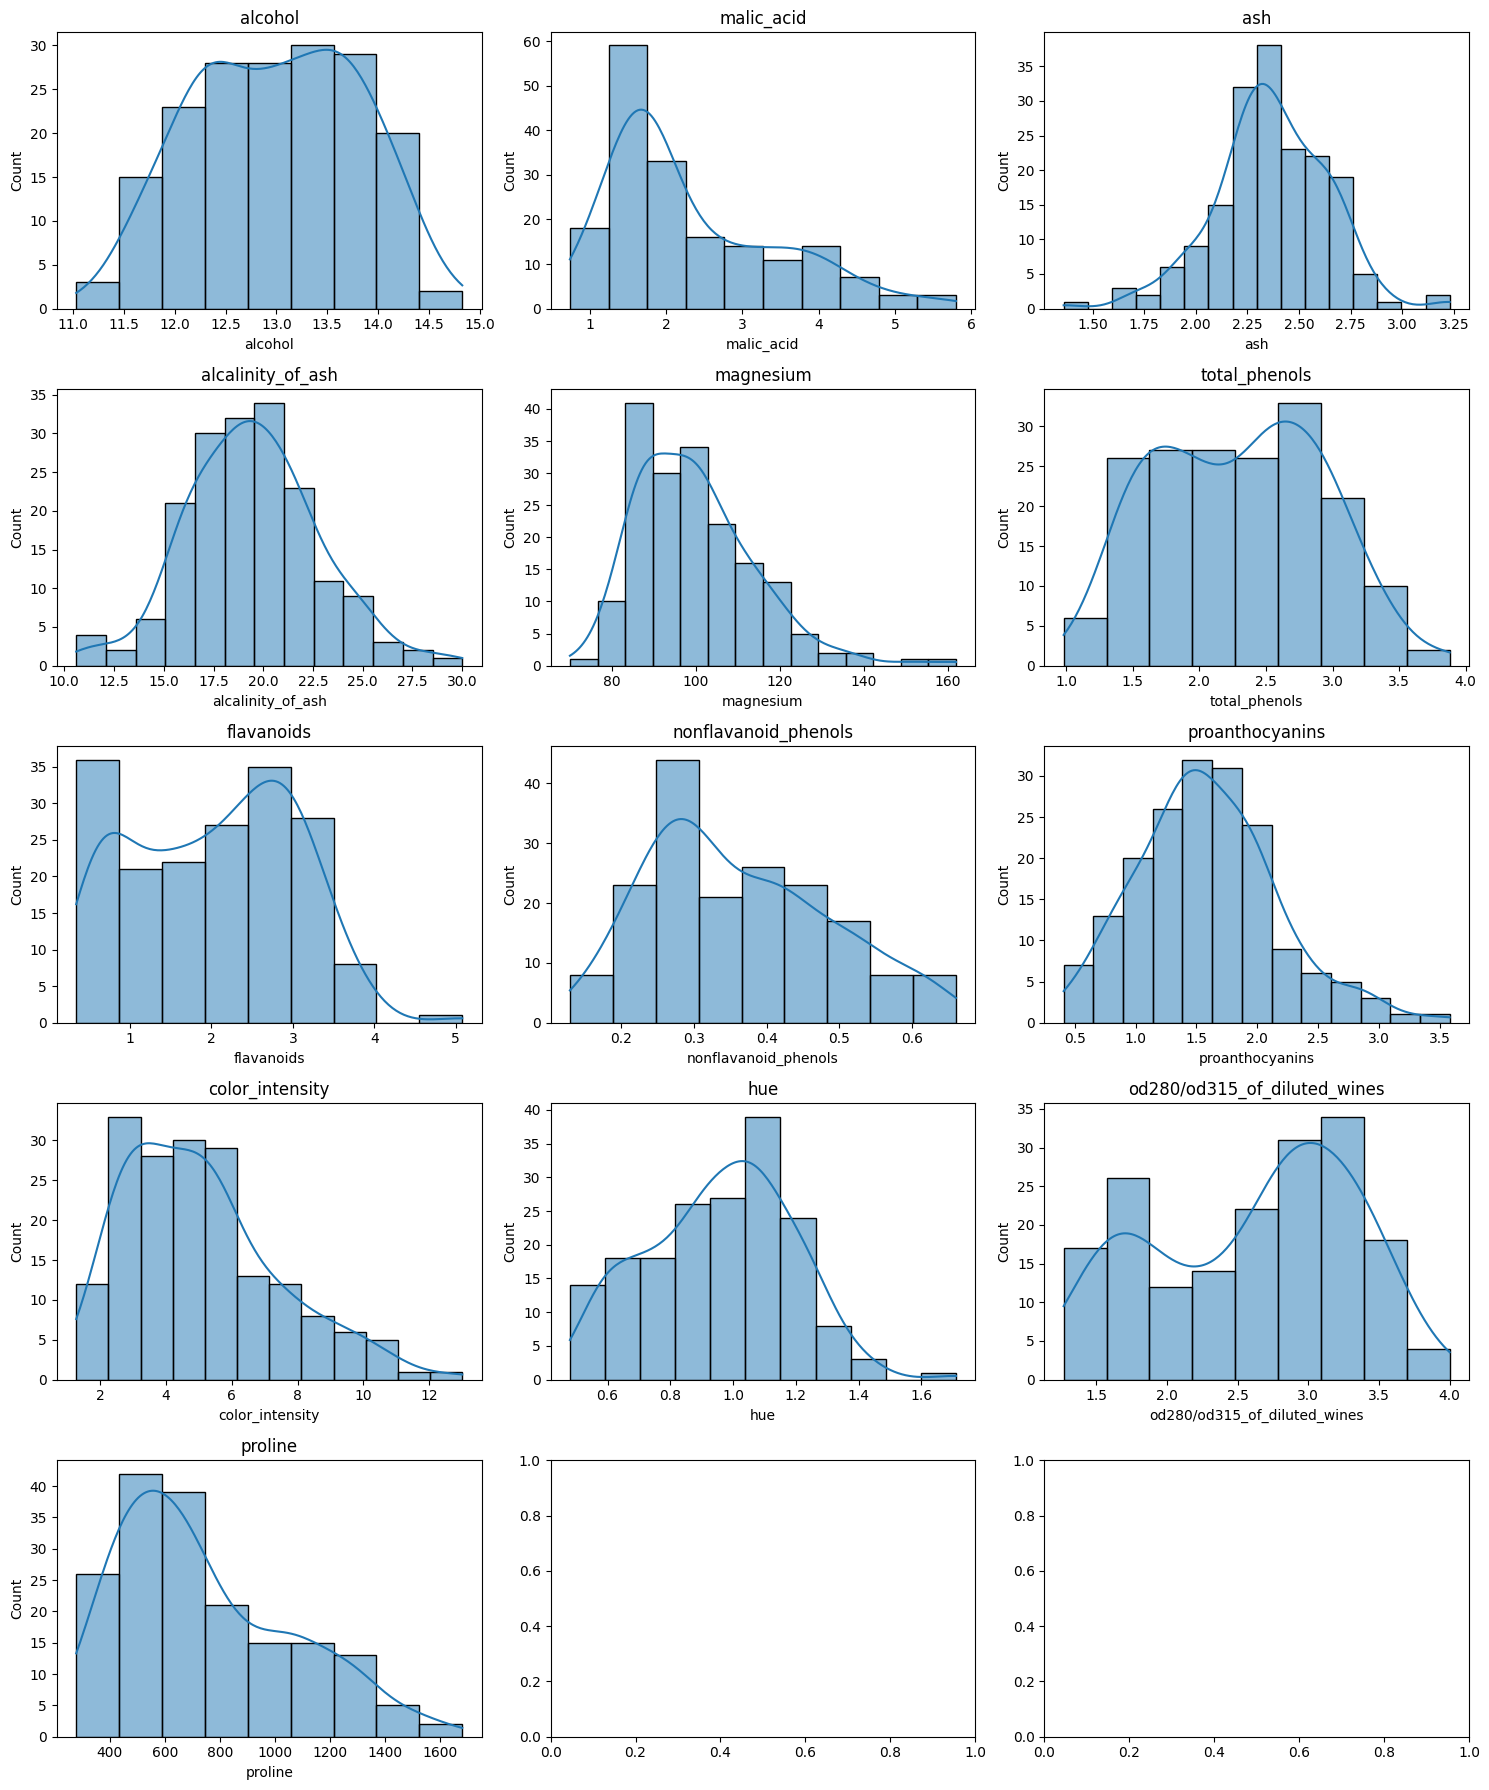

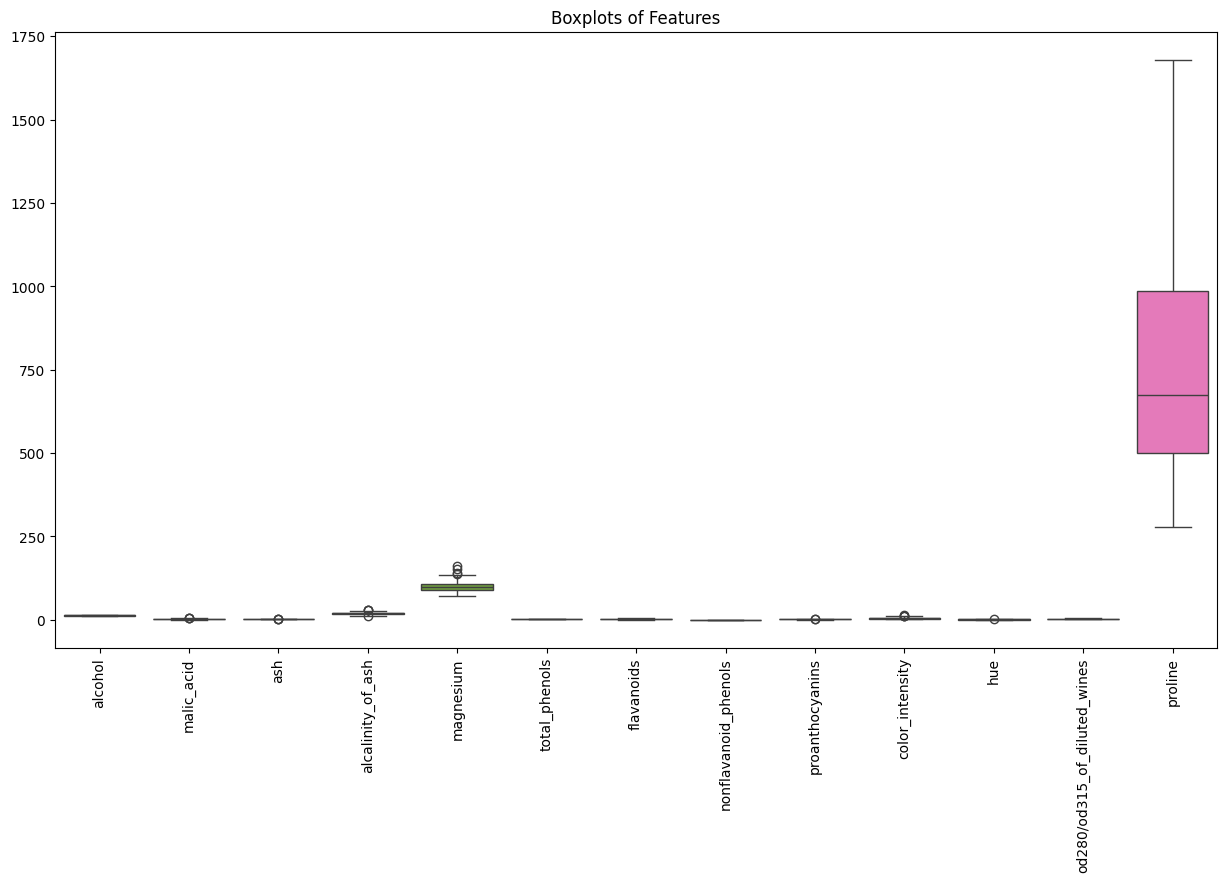

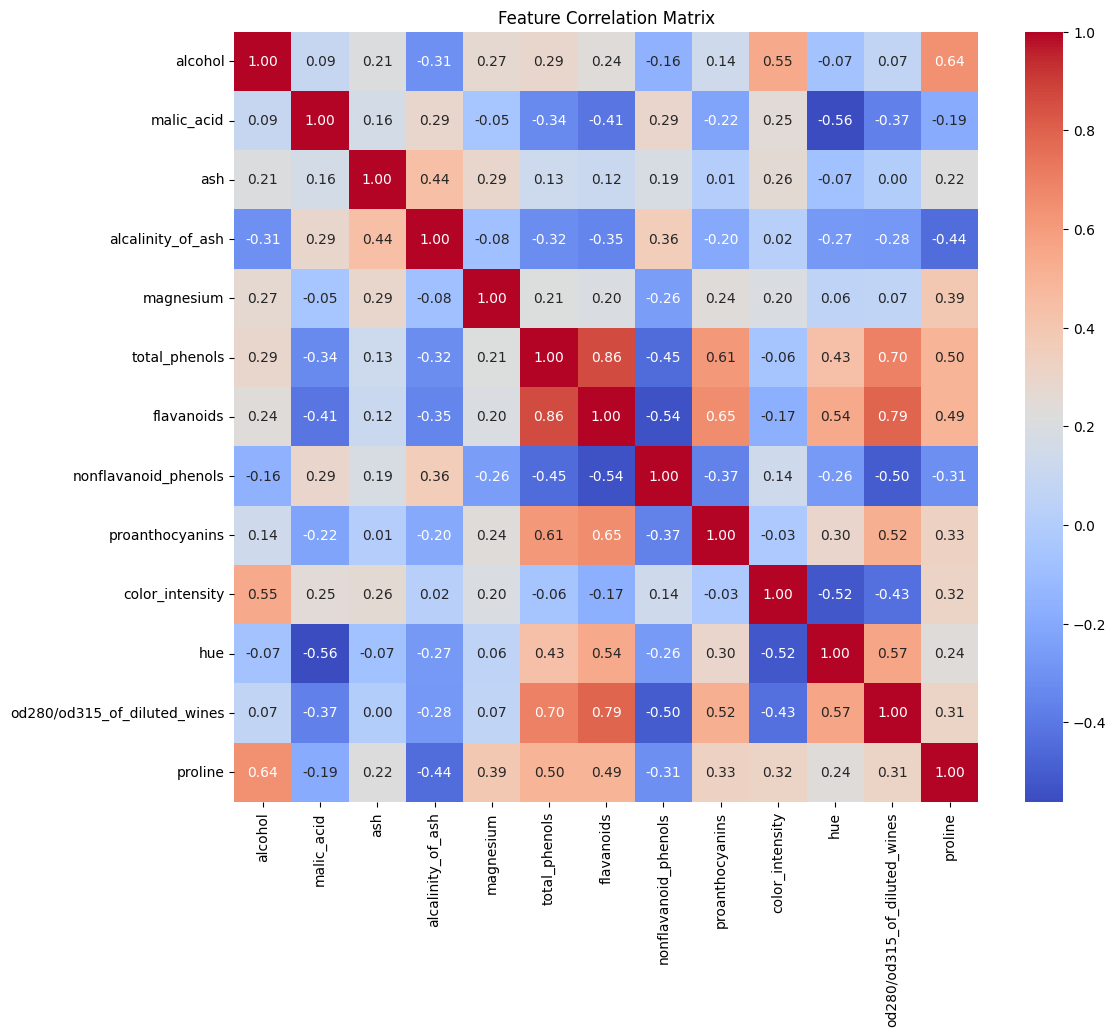

In [7]:
# ## Load Dataset
column_names = [
    'target', 'alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
    'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins',
    'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline'
]
df = pd.read_csv('wine.data', header=None, names=column_names)
df.head()

# ## Feature Distributions
fig, axes = plt.subplots(5, 3, figsize=(15, 18))
axes = axes.flatten()
for idx, col in enumerate(df.columns[1:]):
    sns.histplot(df[col], kde=True, ax=axes[idx])
    axes[idx].set_title(col)
plt.tight_layout()
plt.show()

# ## Boxplots for Outlier Detection
plt.figure(figsize=(15,8))
sns.boxplot(data=df.drop('target', axis=1))
plt.xticks(rotation=90)
plt.title('Boxplots of Features')
plt.show()

# ## Correlation Matrix
plt.figure(figsize=(12,10))
sns.heatmap(df.drop('target', axis=1).corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

# ## Scaling the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop('target', axis=1))

## Section 3: Unsupervised Learning Models
### ================================================

K-Means Silhouette Score: 0.2848589191898987


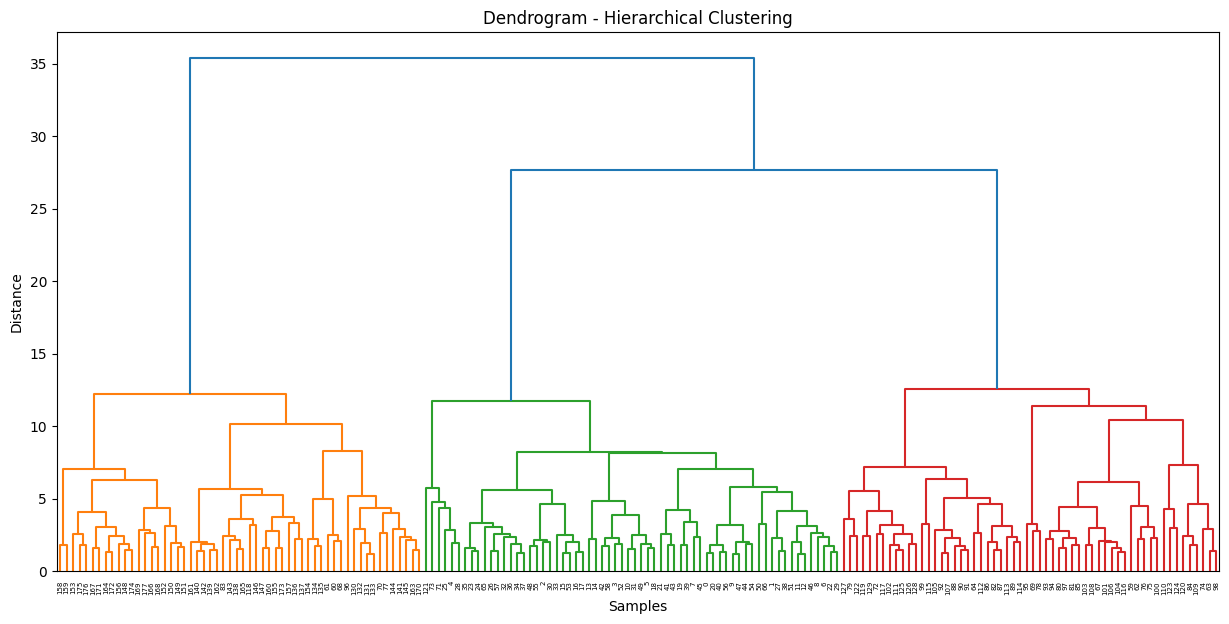

Hierarchical Clustering Silhouette Score: 0.2774439826952265


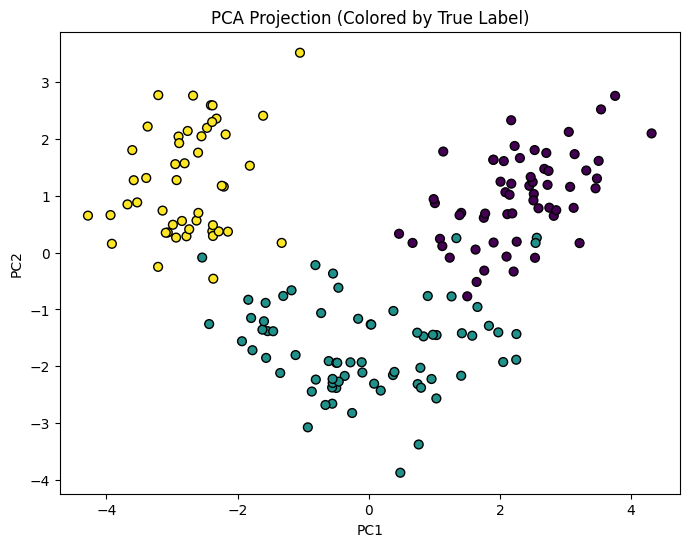

Explained Variance Ratio (first two PCs): [0.36198848 0.1920749 ]
Shape of W (basis components): (178, 3)
Shape of H (encodings): (3, 13)


C:\Users\martz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1742: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


In [8]:
# ### 3.1 K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
print("K-Means Silhouette Score:", silhouette_score(X_scaled, kmeans_labels))

# ### 3.2 Hierarchical Clustering
linkage_matrix = linkage(X_scaled, method='ward')
plt.figure(figsize=(15,7))
dendrogram(linkage_matrix)
plt.title('Dendrogram - Hierarchical Clustering')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical.fit_predict(X_scaled)
print("Hierarchical Clustering Silhouette Score:", silhouette_score(X_scaled, hierarchical_labels))

# ### 3.3 Principal Component Analysis (PCA)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=df['target'], cmap='viridis', edgecolor='k', s=40)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Projection (Colored by True Label)')
plt.show()

print("Explained Variance Ratio (first two PCs):", pca.explained_variance_ratio_)

# ### 3.4 Non-negative Matrix Factorization (NMF)
nmf = NMF(n_components=3, init='random', random_state=42)
W = nmf.fit_transform(np.abs(X_scaled))  # Ensuring non-negative input
H = nmf.components_

print("Shape of W (basis components):", W.shape)
print("Shape of H (encodings):", H.shape)

# Section 4: Model Comparison and Conclusions
# ================================================

# Comparison Summary
- **K-Means** and **Hierarchical Clustering** show reasonable separation (silhouette scores)
- **PCA** helps visualize 2D separability, explaining about 55%+ of variance with two components
- **NMF** provides interpretable factors but needs careful non-negative input

## Conclusions
- **Best clustering** (among tested) seems to occur with K-Means based on silhouette scores.
- **Hierarchical clustering** reveals possible multi-level grouping.
- **Dimensionality reduction** (PCA, NMF) enhances interpretability but may lose information.
